In [7]:

import pandas as pd 
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [18]:
dataset = pd.read_csv('dataset')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


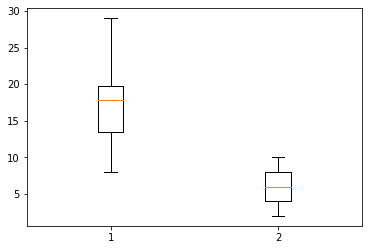

In [11]:
plt.boxplot(dataset)
plt.show()

In [12]:
dataset.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [13]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

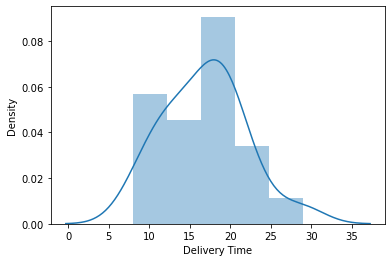

In [14]:
sns.distplot(dataset['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

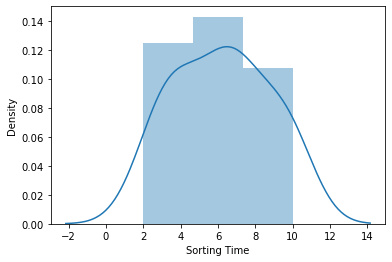

In [15]:
sns.distplot(dataset['Sorting Time'])

Text(0, 0.5, 'Sortingtime')

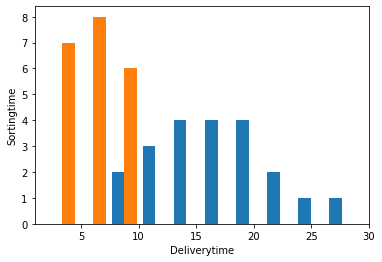

In [16]:
plt.hist(dataset)
plt.xlabel('Deliverytime')
plt.ylabel('Sortingtime')

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

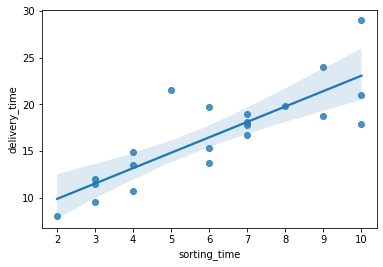

In [28]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [19]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [20]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [21]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [22]:
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [23]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [24]:
new_data=pd.Series([6,9])
new_data

0    6
1    9
dtype: int64

In [25]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,9


In [27]:
model.predict(data_pred)

0    16.476853
1    21.423913
dtype: float64